## Property Prices in San Francisco

* Determine variation in property prices by Supervisor District

* Any correlation between prices and police/fire/311 activity


In [4]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from IPython.display import display, HTML

pd.options.display.float_format = '{0:,.2f}'.format
pd.set_option('display.max_columns', 500)

# File to Load 
data_to_load_311 = "Resources/311_Cases.csv"

fields = ["CaseID","Opened","Closed","Category","Request Type","Address","Supervisor District",
          "Latitude","Longitude","Point"]

# Read 311 Data
data_311 = pd.read_csv(data_to_load_311,usecols=fields,encoding='utf-8')


In [5]:
data_311.head()

,CaseID,Opened,Closed,Category,Request Type,Address,Supervisor District,Latitude,Longitude,Point
0,11030381,06/22/2019 12:42:41 AM,NaN,Noise Report,entertainment,"3440 20TH ST, SAN FRANCISCO, CA, 94110",9.00,37.76,-122.42,"(37.75878688, -122.41783213)"
1,11030374,06/22/2019 12:35:00 AM,NaN,Parking Enforcement,Other_Illegal_Parking,"929 PINE ST, SAN FRANCISCO, CA, 94108",3.00,37.79,-122.41,"(37.790744, -122.411111)"
2,11030372,06/22/2019 12:30:10 AM,NaN,Noise Report,Noise Issue,"3929 18TH ST, SAN FRANCISCO, CA, 94114",8.00,37.76,-122.43,"(37.760941, -122.431236)"
3,11030370,06/22/2019 12:29:03 AM,NaN,Street and Sidewalk Cleaning,General Cleaning,"1001 QUESADA AVE, SAN FRANCISCO, CA, 94124",10.00,37.73,-122.38,"(37.72583, -122.378659)"
4,11030368,06/22/2019 12:27:14 AM,NaN,Noise Report,Noise Issue,"5633 GEARY BLVD, SAN FRANCISCO, CA, 94121",1.00,37.78,-122.48,"(37.7800514, -122.4800261)"


In [6]:
# View the data

# Create a function to extract the year of the complaint
def f(val):
    return val[6:10]

data_311["Year"] = data_311["Opened"].map(f)

In [9]:
# Calculate the number of complaints for each year 

data_311_slice = data_311.loc[(data_311["Year"] >= "2008") 
                              & (data_311["Year"] <= "2018") 
                              & (data_311["Supervisor District"] > 0)]


In [11]:
# Group by year and Supervisor District 

data_311_district=data_311_slice.groupby(["Year","Supervisor District"]).agg(
    {"CaseID" : "count",
    })
data_311_district.sort_values(by=["Year","Supervisor District"], inplace=True)
data_311_district.head()

CaseID
Year Supervisor District        
2008 1.00                   4197
     2.00                   3360
     3.00                   6068
     4.00                   2705
     5.00                   6563

In [90]:
# Pivot table for easier plotting
data_311_district_pivot = data_311_district.pivot_table("CaseID",index="Year", columns=["Supervisor District"] )
data_311_district_pivot.head(12)

Supervisor District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Year,,,,,,,,,,,
2008,4197,3360,6068,2705,6563,6334,3602,6972,8720,9057,3818
2009,10704,7175,14020,5811,15551,15282,8154,13846,20796,17676,11513
2010,11463,7737,12725,7366,18573,17157,8580,15144,20111,17646,11162
2011,12556,8913,15208,7980,18897,20307,9297,17771,20545,17277,10262
2012,13459,10006,15644,8105,19438,21575,9927,18382,22727,18138,10060
2013,17795,13519,21711,9116,26701,30912,11679,25068,31962,19299,12912
2014,21294,16715,29694,12034,34288,43626,14553,31726,38036,23059,13691
2015,20895,17773,31463,13599,38768,47021,15132,35495,51597,28966,15865
2016,28996,19052,52785,15585,42147,66930,16797,43550,67704,45197,18986


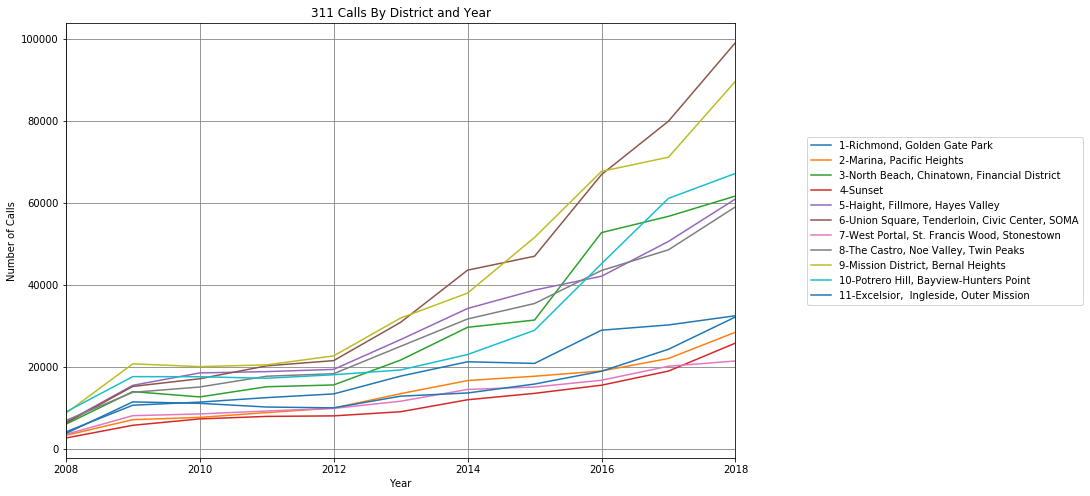

In [16]:
# Plot Calls By Year and District

supervisor_districts = {
1  : "1-Richmond, Golden Gate Park",
2  : "2-Marina, Pacific Heights",
3  : "3-North Beach, Chinatown, Financial District",
4  : "4-Sunset",
5  : "5-Haight, Fillmore, Hayes Valley",
6  : "6-Union Square, Tenderloin, Civic Center, SOMA",
7  : "7-West Portal, St. Francis Wood, Stonestown",
8  : "8-The Castro, Noe Valley, Twin Peaks",
9  : "9-Mission District, Bernal Heights",
10 : "10-Potrero Hill, Bayview-Hunters Point",
11 : "11-Excelsior,  Ingleside, Outer Mission",
}


def major_formatter(x, pos):
    return "[%.2f]" % x
import matplotlib.pyplot as plt
ax = data_311_district_pivot.plot(figsize=(12,8), legend = False)
plt.legend(list(supervisor_districts.values()),  bbox_to_anchor=(1.1, 0.75))

# Complete formatting the plot 
plt.title('311 Calls By District and Year')
plt.xlabel("Year")
plt.ylabel("Number of Calls")
plt.grid(linestyle='-', color = 'gray')


plt.show()

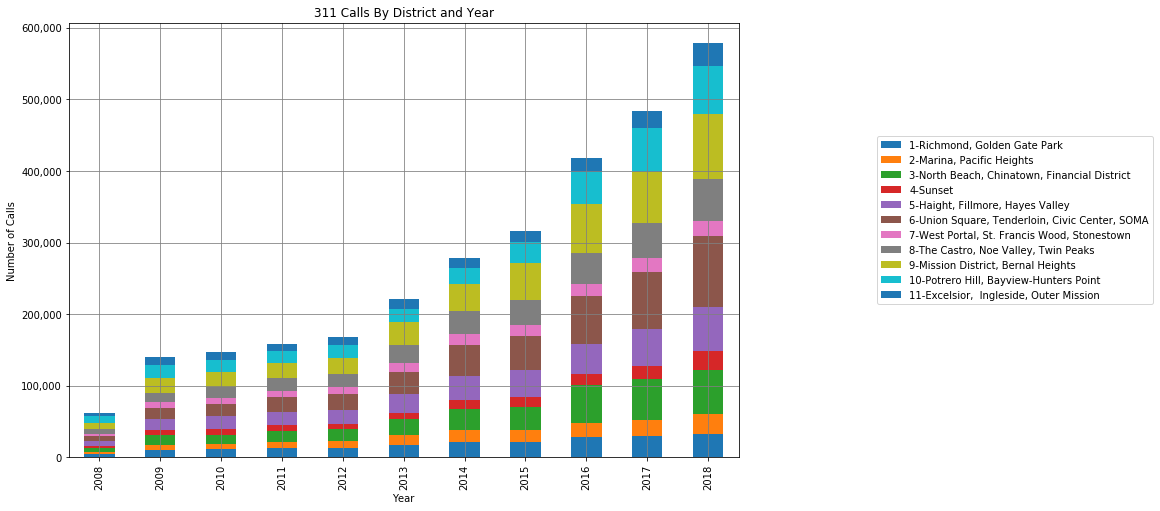

In [18]:
# Stacked Bar Plot of Calls By Year

ax = data_311_district_pivot.plot.bar(stacked=True, figsize=(12,8), legend = False)
plt.legend(list(supervisor_districts.values()),  bbox_to_anchor=(1.2, 0.75))

# Complete formatting the plot 
plt.title('311 Calls By District and Year')
plt.xlabel("Year")
plt.ylabel("Number of Calls")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
   plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [20]:
# Stacked Bar Plot of Call Type By Year

data_311_category = data_311.loc[(data_311["Year"] >= "2006") & (data_311["Year"] <= "2018") 
                              & (data_311["Supervisor District"] > 0)
                              & (data_311["Category"].str[:7] != "General")] 
                                 
data_311_category["Year"].value_counts 

data_311_group=data_311_category.groupby(["Year","Category"]).agg(
    {"CaseID" : "count",
    })
data_311_group.sort_values(by=["CaseID"], ascending = False, inplace=True)
data_311_group.head()
total_calls = len(data_311_category)

data_311_group["Percent"]=data_311_group["CaseID"]/total_calls

data_311_group.head(200)

pie_311 = data_311_group.loc[(data_311_group["Percent"]>.001)]
pie_311.head(10)

pie_311_pivot = pie_311.pivot_table("CaseID",index="Year", columns=["Category"] )
pie_311_pivot.head(20)

Category,311 External Request,Abandoned Vehicle,Blocked Street or SideWalk,Damaged Property,Encampments,Graffiti,Homeless Concerns,Illegal Postings,Litter Receptacles,MUNI Feedback,Noise Report,Parking Enforcement,Rec and Park Requests,SFHA Requests,Sewer Issues,Sidewalk or Curb,Sign Repair,Street Defects,Street and Sidewalk Cleaning,Streetlights,Temporary Sign Request,Tree Maintenance
Year,,,,,,,,,,,,,,,,,,,,,,
2008,nan,"5,036.00",nan,nan,nan,"8,920.00",nan,nan,nan,nan,nan,nan,nan,"7,423.00",nan,nan,nan,nan,"21,659.00",nan,nan,nan
2009,nan,"9,707.00",nan,nan,"2,912.00","32,252.00",nan,nan,"3,539.00",nan,nan,nan,"3,030.00","10,640.00","4,425.00",nan,"3,814.00","3,462.00","46,411.00",nan,nan,"4,628.00"
2010,"3,113.00","10,831.00",nan,"6,240.00","2,921.00","26,742.00",nan,nan,"3,388.00",nan,nan,nan,"3,184.00","9,576.00","4,452.00",nan,"3,043.00","4,018.00","47,895.00","3,688.00",nan,"4,108.00"
2011,nan,"12,894.00",nan,"6,846.00","3,209.00","25,396.00",nan,nan,"4,062.00",nan,nan,nan,nan,"8,578.00","5,268.00",nan,nan,"3,565.00","55,584.00","6,704.00",nan,"4,648.00"
2012,nan,"14,992.00",nan,"7,425.00","3,001.00","26,204.00",nan,"2,902.00","3,508.00",nan,nan,nan,"2,873.00","7,541.00","7,172.00","3,417.00",nan,"3,528.00","55,426.00","7,112.00",nan,"5,358.00"
2013,nan,"17,544.00",nan,"12,910.00","3,344.00","35,758.00",nan,"7,886.00","4,592.00",nan,nan,nan,"3,735.00","6,598.00","7,568.00","3,311.00","3,309.00","4,291.00","69,778.00","7,880.00","5,413.00","5,488.00"
2014,nan,"20,292.00","3,045.00","17,720.00","3,332.00","46,598.00",nan,"6,560.00","5,577.00","9,104.00",nan,nan,"4,807.00","6,221.00","9,719.00","4,924.00","4,212.00","5,783.00","90,558.00","9,566.00","3,090.00","6,120.00"
2015,nan,"22,213.00","4,001.00","10,854.00","6,609.00","56,385.00",nan,"10,103.00","6,073.00","8,708.00",nan,nan,"5,790.00","5,190.00","10,793.00","3,961.00","6,542.00","6,171.00","110,684.00","7,606.00","3,748.00","7,167.00"
2016,nan,"28,089.00","4,208.00","9,837.00","26,731.00","69,208.00","7,161.00","7,933.00","7,002.00","10,841.00","3,513.00",nan,"6,533.00","3,591.00","9,610.00","5,281.00","6,783.00","8,715.00","161,863.00","8,458.00",nan,"7,941.00"


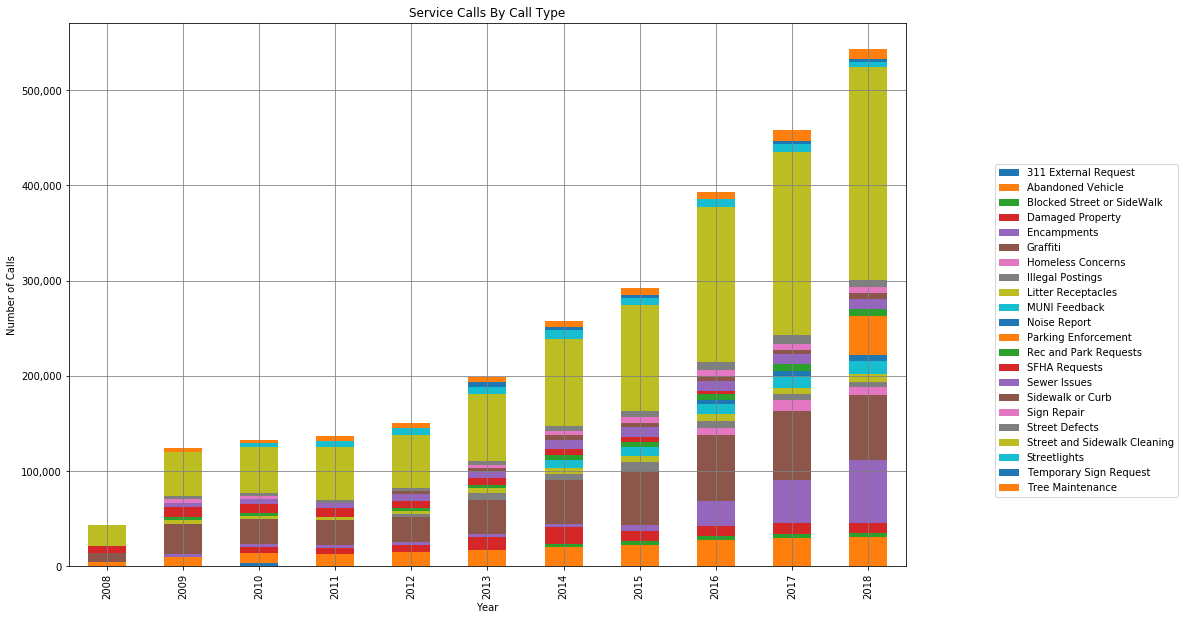

In [24]:
ax = pie_311_pivot.plot.bar(stacked=True, figsize=(15,10), legend = False)
plt.legend((pie_311_pivot.columns.tolist()),  bbox_to_anchor=(1.1, 0.75))

# Complete formatting the plot
plt.title('Service Calls By Call Type')
plt.xlabel("Year")
plt.ylabel("Number of Calls")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
 plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

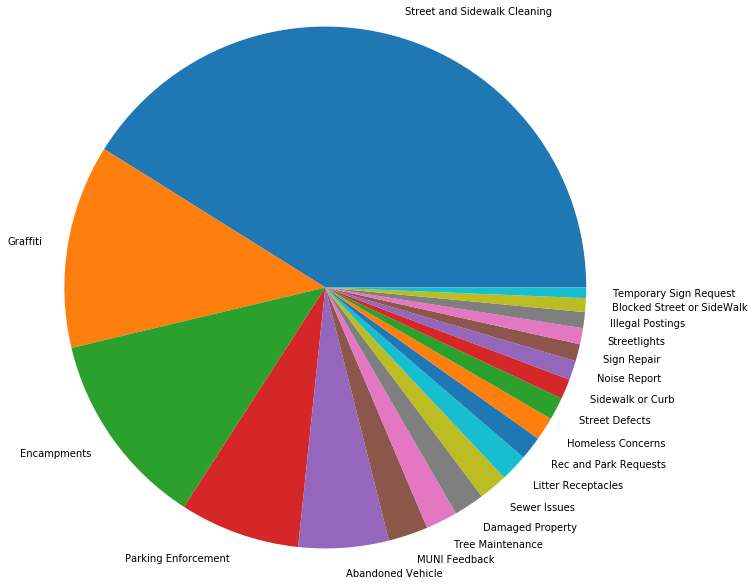

In [89]:
# Redo it all for Pie Plot

data_311_category = data_311.loc[(data_311["Year"] == "2018") 
                              & (data_311["Supervisor District"] > 0)
                              & (data_311["Category"].str[:7] != "General")] 
                                 
data_311_group=data_311_category.groupby(["Category"]).agg(
    {"CaseID" : "count",
    })
data_311_group.sort_values(by=["CaseID"], ascending = False, inplace=True)
data_311_group.head()

total_calls = len(data_311_group)

data_311_group["Ratio"]=data_311_group["CaseID"]/total_calls

data_311_group.head(200)

pie_311 = data_311_group.loc[(data_311_group["Ratio"]>100)]

plt.pie(pie_311["CaseID"], radius=3, labels=pie_311.index)  
plt.show()


In [157]:
# Group the 311 calls for 2018 by Lat/Long

def q(val):
    return round(val,3)

data_311["lat"] = data_311["Latitude"].map(q)
data_311["long"] = data_311["Longitude"].map(q)
geo_slice = data_311.loc[(data_311["Year"] == "2018") 
                              & (data_311["Supervisor District"] > 0)
                              & (data_311["Latitude"] > 0 )]
data_slice_group=geo_slice.groupby(["lat","long"]).agg(
    {"CaseID" : "count"
    })
data_slice_group.head()



def to_gis (x, y):
    yy = ()
    yy = yy + (x,)
    yy = yy + (y,)
    return tuple(yy)

# Put coordinates of these properties into a list (a list of tuples)
property_list = []
for i in range(len(data_slice_group)):
    property_list.append(to_gis(geo_slice.iloc[i]["lat"],geo_slice.iloc[i]["long"]))


In [158]:
# Total points to plot
print (len(property_list))

10419


In [116]:
# Set up the Google Maps API Call
import requests
import json

# Google developer API key
from config import gkey
import gmaps

In [161]:
gmaps.configure(api_key=gkey)

# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

weights = list(data_slice_group["CaseID"])

In [163]:
# Heatmap of Complaints for 2018

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations=property_list,weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))